In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
import matplotlib.ticker as ticker

In [2]:
df = pd.read_json('data.json')
df.head(5)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,name,release_date
0,0.582,0.525,1,-7.163,0,0.0627,0.11100,0.000000,0.1340,0.510,133.249,audio_features,2Ch7LmS7r2Gy2kc64wv3Bz,spotify:track:2Ch7LmS7r2Gy2kc64wv3Bz,https://api.spotify.com/v1/tracks/2Ch7LmS7r2Gy...,https://api.spotify.com/v1/audio-analysis/2Ch7...,260253,4,Die For You,2016-11-25
1,0.735,0.795,11,-6.523,0,0.1130,0.02960,0.000032,0.0678,0.905,122.000,audio_features,1nH2PkJL1XoUq8oE6tBZoU,spotify:track:1nH2PkJL1XoUq8oE6tBZoU,https://api.spotify.com/v1/tracks/1nH2PkJL1XoU...,https://api.spotify.com/v1/audio-analysis/1nH2...,188918,4,Sacrifice,2022-01-06
2,0.698,0.769,8,-7.154,1,0.0368,0.01280,0.001660,0.2380,0.354,121.020,audio_features,2vgUijXOTRMnWXDtvgMp2b,spotify:track:2vgUijXOTRMnWXDtvgMp2b,https://api.spotify.com/v1/tracks/2vgUijXOTRMn...,https://api.spotify.com/v1/audio-analysis/2vgU...,339023,4,Take My Breath,2022-01-06
3,0.514,0.730,1,-5.934,1,0.0598,0.00146,0.000095,0.0897,0.334,171.005,audio_features,0VjIjW4GlUZAMYd2vXMi3b,spotify:track:0VjIjW4GlUZAMYd2vXMi3b,https://api.spotify.com/v1/tracks/0VjIjW4GlUZA...,https://api.spotify.com/v1/audio-analysis/0VjI...,200040,4,Blinding Lights,2020-03-20
4,0.667,0.721,7,-5.349,0,0.0330,0.00248,0.000062,0.0753,0.703,100.018,audio_features,1F65jvOrItxUyNK30z6Yht,spotify:track:1F65jvOrItxUyNK30z6Yht,https://api.spotify.com/v1/tracks/1F65jvOrItxU...,https://api.spotify.com/v1/audio-analysis/1F65...,237522,4,In Your Eyes,2021-02-05


In [4]:
df.shape

(156, 20)

In [5]:
drop_columns = ['type', 'id', 'uri', 'track_href', 'analysis_url']

In [6]:
df1 = df.copy()
df1.drop(drop_columns, axis = 1, inplace = True)
df1

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,name,release_date
0,0.582,0.525,1,-7.163,0,0.0627,0.11100,0.000000,0.1340,0.510,133.249,260253,4,Die For You,2016-11-25
1,0.735,0.795,11,-6.523,0,0.1130,0.02960,0.000032,0.0678,0.905,122.000,188918,4,Sacrifice,2022-01-06
2,0.698,0.769,8,-7.154,1,0.0368,0.01280,0.001660,0.2380,0.354,121.020,339023,4,Take My Breath,2022-01-06
3,0.514,0.730,1,-5.934,1,0.0598,0.00146,0.000095,0.0897,0.334,171.005,200040,4,Blinding Lights,2020-03-20
4,0.667,0.721,7,-5.349,0,0.0330,0.00248,0.000062,0.0753,0.703,100.018,237522,4,In Your Eyes,2021-02-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,0.680,0.842,0,-5.796,1,0.0524,0.27800,0.000034,0.1200,0.804,118.015,220803,4,Save Your Tears - OPN Remix,2020-04-02
152,0.523,0.730,1,-3.715,0,0.0754,0.15500,0.000000,0.1240,0.170,75.038,165354,4,Heartless - Vapor Wave Remix,2020-04-02
153,0.605,0.536,0,-7.427,0,0.0494,0.42600,0.161000,0.0870,0.280,109.016,238128,4,After Hours - The Blaze Remix,2020-04-02
154,0.458,0.642,0,-5.610,1,0.0380,0.11000,0.000000,0.9840,0.215,87.921,217834,4,Scared To Live - SNL Live,2020-04-02


Text(0.5, 1.0, 'Correlation Matrix of track data')

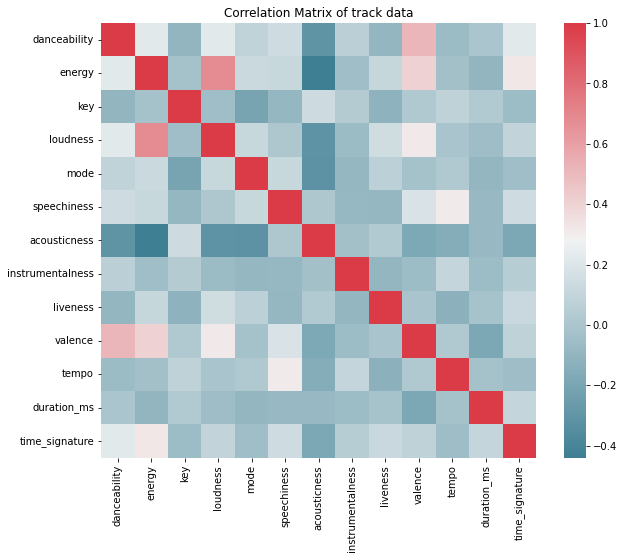

In [7]:
#getting correlation matrix
f, ax = plt.subplots(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool_), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)
plt.title('Correlation Matrix of track data')

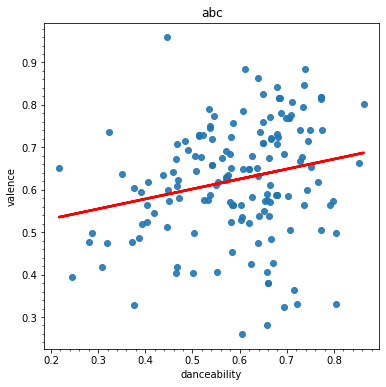

In [8]:
# correlation between danceability and energy

x = df['danceability'].values
y = df['energy'].values

x = x.reshape(x.shape[0],1)
y = y.reshape(y.shape[0],1)

regr = linear_model.LinearRegression()
regr.fit(x,y)

figure = plt.figure(figsize = (6,6))
plt.title('abc')

ax = plt.subplot(1, 1, 1)
ax.scatter(x, y, alpha=0.9)
ax.plot(x, regr.predict(x), color="red", linewidth=2.5)
plt.xticks(())
plt.yticks(())

ax.xaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.02))

ax.yaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(0.02))

plt.xlabel("danceability")
plt.ylabel("valence")

plt.show()